In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment',  None)

In [2]:
use_log = pd.read_csv('use_log.csv')

In [3]:
customer_master = pd.read_csv('customer_master.csv')

In [4]:
campaign_master = pd.read_csv('campaign_master.csv')

In [5]:
class_master = pd.read_csv('class_master.csv')

In [6]:
use_log.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [7]:
class_master.head()

,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [8]:
campaign_master.head()

,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [9]:
customer_master.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


### 고객 데이터 가공하기

In [10]:
customer_join = pd.merge(customer_master,campaign_master,how = 'left', on = 'campaign_id')

In [11]:
customer_join = pd.merge(customer_join, class_master, how = 'left',on= 'class')

In [12]:
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,2_일반,0_종일,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,2_일반,0_종일,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,2_일반,0_종일,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,2_일반,0_종일,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_일반,2_야간,6000


In [13]:
customer_join.isna().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
campaign_name       0
class_name          0
price               0
dtype: int64

In [14]:
customer_join.groupby('class_name') \
            .agg(n = ('customer_id','count'))

,n
class_name,
0_종일,2045
1_주간,1019
2_야간,1128


In [15]:
customer_join.groupby('gender') \
            .agg( n = ('customer_id','count'))

,n
gender,
F,1983
M,2209


In [16]:
customer_join.groupby('campaign_name') \
            .agg(n = ('customer_id','count'))

,n
campaign_name,
0_입회비반액할인,650
1_입회비무료,492
2_일반,3050


In [17]:
customer_join.groupby('is_deleted') \
            .agg(n = ('customer_id','count'))

,n
is_deleted,
0,2842
1,1350


In [18]:
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])

In [19]:
customer_start = customer_join.loc[customer_join['start_date']>pd.to_datetime("20180401")]

In [20]:
len(customer_start)

1361

### 최신 고객 데이터를 집계하자

In [21]:
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])

In [22]:
customer_newer = customer_join.loc[(customer_join['end_date']>=pd.to_datetime("20190331")) | (customer_join['end_date'].isna())]

In [23]:
len(customer_newer)

2953

In [24]:
customer_newer['end_date'].unique()

array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [25]:
customer_newer.groupby('class_name') \
            .agg(n= ('customer_id','count'))

,n
class_name,
0_종일,1444
1_주간,696
2_야간,813


In [26]:
customer_newer.groupby('campaign_name') \
            .agg(n= ('customer_id','count'))

,n
campaign_name,
0_입회비반액할인,311
1_입회비무료,242
2_일반,2400


In [27]:
customer_newer.groupby('gender') \
            .agg(n=('customer_id','count'))

,n
gender,
F,1400
M,1553


### 이용 이력 데이터를 집계하자

In [28]:
use_log.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [29]:
use_log['usedate'] = pd.to_datetime(use_log['usedate'])

In [30]:
use_log['연월'] = use_log['usedate'].dt.strftime('%Y%m')

In [31]:
use_log_months = use_log.groupby(['연월','customer_id'],as_index = False) \
                        .agg(count = ('customer_id','count'))

In [32]:
uselog_customer = use_log_months.groupby('customer_id') \
                                .agg(['mean','median','max','min'])['count']

In [33]:
uselog_customer

,mean,median,max,min
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4
...,...,...,...,...
TS995853,9.500000,9.5,11,8
TS998593,8.142857,8.0,9,7
TS999079,4.916667,5.5,9,2


### 이용 이력 데이터로부터 정기 이용 플래그를 작성하자

In [34]:
use_log['weekday'] = use_log['usedate'].dt.weekday

In [35]:
uselog_weekday = use_log.groupby(['customer_id','연월','weekday'],as_index = False) \
                        .count().drop(columns = 'usedate')

In [36]:
uselog_weekday = uselog_weekday.rename(columns = {'log_id' : 'count'})

In [37]:
uselog_weekday.groupby('customer_id',as_index = False).max()[['customer_id','count']]

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5
...,...,...
4187,TS995853,5
4188,TS998593,5
4189,TS999079,5
4190,TS999231,5


In [38]:
uselog_weekday['routine_flg'] = 0

In [39]:
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count'] < 4 , 1)

In [40]:
uselog_weekday.head()

,customer_id,연월,weekday,count,routine_flg
0,AS002855,201804,5,4,1
1,AS002855,201805,2,1,0
2,AS002855,201805,5,4,1
3,AS002855,201806,5,5,1
4,AS002855,201807,1,1,0


### 고객 데이터와 이용 이력 데이터를 결합하자

In [41]:
customer_join = pd.merge(customer_join , uselog_customer, how = 'left',on = 'customer_id')

In [42]:
customer_join = pd.merge(customer_join,uselog_weekday[['customer_id','routine_flg']], how = 'left', on = 'customer_id')

In [43]:
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,2_일반,0_종일,10500,4.833333,5.0,8,2,0
1,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,2_일반,0_종일,10500,4.833333,5.0,8,2,0
2,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,2_일반,0_종일,10500,4.833333,5.0,8,2,1
3,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,2_일반,0_종일,10500,4.833333,5.0,8,2,1
4,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,2_일반,0_종일,10500,4.833333,5.0,8,2,0


In [44]:
customer_join.isna().sum()

customer_id          0
name                 0
class                0
gender               0
start_date           0
end_date         73671
campaign_id          0
is_deleted           0
campaign_name        0
class_name           0
price                0
mean                 0
median               0
max                  0
min                  0
routine_flg          0
dtype: int64

### 회원 기간을 계산하자

In [45]:
from dateutil.relativedelta import relativedelta

In [46]:
customer_join['calc_date'] = customer_join['end_date']

In [47]:
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime('20190430'))

In [48]:
customer_join['membership_period'] = 0
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])

In [49]:
for i in range(len(customer_join)) :
        delta = relativedelta(customer_join['calc_date'].iloc[i],customer_join['start_date'].iloc[i])
        customer_join['membership_period'].iloc[i] = delta.years*12 + delta.months
    
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,2_일반,0_종일,10500,4.833333,5.0,8,2,0,2019-04-30,47
1,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,2_일반,0_종일,10500,4.833333,5.0,8,2,0,2019-04-30,47
2,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,2_일반,0_종일,10500,4.833333,5.0,8,2,1,2019-04-30,47
3,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,2_일반,0_종일,10500,4.833333,5.0,8,2,1,2019-04-30,47
4,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,2_일반,0_종일,10500,4.833333,5.0,8,2,0,2019-04-30,47


In [50]:
customer_join[['mean','median','max','min']].describe()

,mean,median,max,min
count,93333.000000,93333.000000,93333.000000,93333.000000
mean,5.632080,5.573731,8.348183,3.080936
std,1.488784,1.592073,1.692409,1.739029
min,1.000000,1.000000,1.000000,1.000000
25%,4.583333,4.500000,7.000000,2.000000
50%,5.333333,5.000000,8.000000,3.000000
75%,6.666667,6.500000,10.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [51]:
customer_join.groupby('routine_flg').count()['customer_id']

routine_flg
0    70469
1    22864
Name: customer_id, dtype: int64

In [52]:
import matplotlib.pyplot as plt

(array([ 9986., 16226.,  9916., 11356.,  8368.,  9275.,  8442.,  5743.,
         6839.,  7182.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

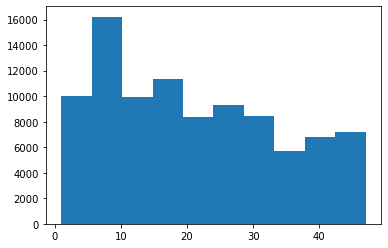

In [53]:
plt.hist(customer_join['membership_period'])

### 탈퇴 회원과 지속 회원의 차이를 파악하자

In [54]:
customer_end = customer_join.loc[customer_join['is_deleted']==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,19662.0,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000
mean,1.0,8646.170278,4.253671,3.991608,7.516173,1.698759,0.056403,8.494660
std,0.0,1947.676619,0.930684,1.052525,1.945684,0.884591,0.230705,4.746388
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,7500.000000,3.727273,3.000000,7.000000,1.000000,0.000000,5.000000
50%,1.0,10500.000000,4.250000,4.000000,8.000000,1.000000,0.000000,8.000000
75%,1.0,10500.000000,4.800000,5.000000,9.000000,2.000000,0.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [55]:
customer_stay = customer_join.loc[customer_join['is_deleted'] == 0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,73671.0,73671.000000,73671.000000,73671.000000,73671.000000,73671.000000,73671.000000,73671.000000
mean,0.0,8559.473877,5.999962,5.995982,8.570238,3.449824,0.295299,24.372263
std,0.0,1971.708976,1.390840,1.438464,1.544122,1.725275,0.456180,12.457883
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.916667,5.000000,7.000000,2.000000,0.000000,14.000000
50%,0.0,7500.000000,5.666667,6.000000,8.000000,3.000000,0.000000,24.000000
75%,0.0,10500.000000,7.000000,7.000000,10.000000,4.000000,1.000000,34.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000
